In [1]:
# Plotting header
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from jupyterthemes import jtplot
jtplot.style(figsize=(15, 8))
%config InlineBackend.figure_format = 'svg' 
plt.rcParams['image.cmap'] = 'viridis'

### Importing dataset

In [2]:
import pandas as pd
# From https://www.kaggle.com/mlg-ulb/creditcardfraud
df = pd.read_csv("../datasets/creditcard.csv")
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.165980e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.373150e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.086869e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.490107e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.177556e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406455e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


### Simple Decision trees
Trying to construct a good model to predict fraud

In [8]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from collections import Counter
# Deal with imbalanced datasets
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
import numpy as np
X = df.drop(columns=["Class"])
y = df[["Class"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

def classify(X_train, X_test, y_train, y_test):
    print(f"-- Shapes --\nX_train = {X_train.shape}, X_test = {X_test.shape}, y_train = {y_train.shape}, y_test = {y_test.shape}")
    clf = tree.DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, criterion="entropy", random_state = 42)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    #print(metrics.classification_report(y_test, pred))
    print("Recall score (train): ", metrics.recall_score(y_train, clf.predict(X_train)))
    print("Recall score  (test): ", metrics.recall_score(y_test, pred))
    print(f"Accuracy: {metrics.accuracy_score(y_test, pred)}")
    return clf

print(sorted(Counter(y_train["Class"]).items()))
classify(X_train, X_test, y_train, y_test)
print("---------------  SMOTEENN   ---------------")
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train["Class"])
print(sorted(Counter(y_resampled).items()))
classify(X_resampled, X_test, y_resampled, y_test)
print("---------------  SMOTETomek ---------------")
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train["Class"])
print(sorted(Counter(y_resampled).items()))
final_clf = classify(X_resampled, X_test, y_resampled, y_test)

[(0, 227454), (1, 391)]
-- Shapes --
X_train = (227845, 30), X_test = (56962, 30), y_train = (227845, 1), y_test = (56962, 1)
Recall score (train):  0.8132992327365729
Recall score  (test):  0.7821782178217822
Accuracy: 0.999403110845827
---------------  SMOTEENN   ---------------
[(0, 207922), (1, 217572)]
-- Shapes --
X_train = (425494, 30), X_test = (56962, 30), y_train = (425494,), y_test = (56962, 1)
Recall score (train):  0.9952107807989998
Recall score  (test):  0.8712871287128713
Accuracy: 0.9907131069836032
---------------  SMOTETomek ---------------
[(0, 226694), (1, 226694)]
-- Shapes --
X_train = (453388, 30), X_test = (56962, 30), y_train = (453388,), y_test = (56962, 1)
Recall score (train):  0.9927567558029767
Recall score  (test):  0.8910891089108911
Accuracy: 0.9882904392401952


### Grid search
-> Preferring SMOTETomek, as it has the same recall score in test set a SMOTEENN, but it has lower recall in the test set.

In [4]:
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
run_gridsearch = False
# Giving higher value to the recall 
def f2_score(y_true, y_pred):
    return metrics.fbeta_score(y_true, y_pred, 2)
pipe_tree = make_pipeline(tree.DecisionTreeClassifier(random_state=42))
param_grid = [{'decisiontreeclassifier__max_depth':np.arange(3, 10),
              'decisiontreeclassifier__min_samples_leaf': [10, 20, 50, 100],
              'decisiontreeclassifier__criterion': ["gini", "entropy"]}]
if run_gridsearch:
    gs = GridSearchCV(estimator=pipe_tree, param_grid=param_grid, scoring=make_scorer(f2_score), cv=5, n_jobs=-1)
    gs = gs.fit(X_resampled, y_resampled)

#### The best model found

In [5]:
if run_gridsearch:
    print("Best f2-score found: ", gs.best_score_)
    print("Best parameters combination:", gs.best_params_)
    clf = gs.best_estimator_
    clf = clf.fit(X_resampled, y_resampled)
    pred = clf.predict(X_test)
    print("Recall score (train): ", metrics.recall_score(y_resampled, clf.predict(X_resampled)))
    print("Recall score  (test): ", metrics.recall_score(y_test, pred))


### Display

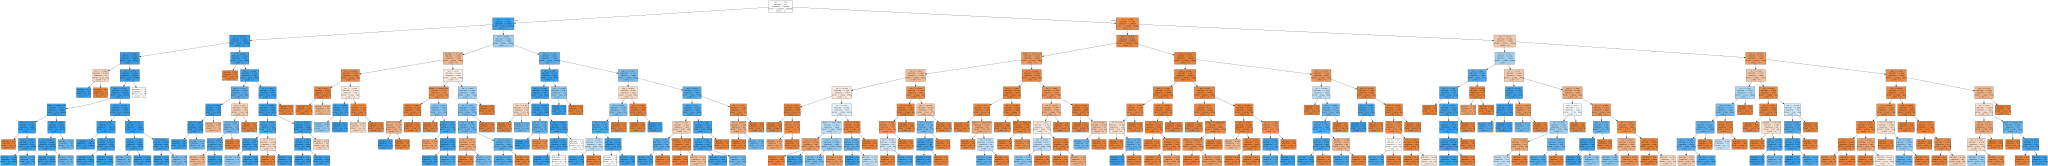

In [6]:
# Display
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
graph = Source(export_graphviz(final_clf, out_file=None, feature_names=X.columns.values.tolist(), 
                               class_names=["0", "1"], filled = True))
display(SVG(graph.pipe(format="svg")))

### XGBoost

Start Feeding Data
Start Training


/Users/juliano.garcia/miniconda3/envs/boosting/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/juliano.garcia/miniconda3/envs/boosting/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Start Predicting
Metrics
Accuracy: 0.9985077771145676
AUC: 0.9753223119571942
F1 Score: 0.67680608365019
F2 Score: 0.786219081272085


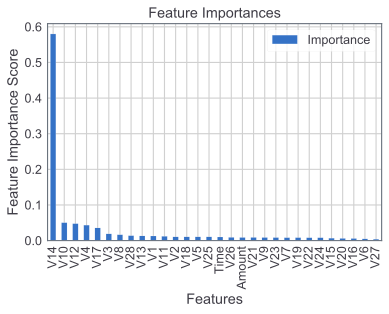

   Features  Importance
14      V14    0.579973
10      V10    0.050400
12      V12    0.047546
4        V4    0.043381
17      V17    0.035581
3        V3    0.018861
8        V8    0.016531
28      V28    0.013756
13      V13    0.013043
1        V1    0.012969
11      V11    0.012094
2        V2    0.010508
18      V18    0.010507
5        V5    0.010426
25      V25    0.010413
0      Time    0.010164
26      V26    0.008977
29   Amount    0.008887
21      V21    0.008739
9        V9    0.008646
23      V23    0.008478
7        V7    0.008291
19      V19    0.008190
22      V22    0.008023
24      V24    0.008019
15      V15    0.006753
20      V20    0.006249
16      V16    0.005764
6        V6    0.004856
27      V27    0.003973
['V14', 'V10', 'V12', 'V4', 'V17', 'V3', 'V8', 'V28', 'V13', 'V1', 'V11', 'V2', 'V18', 'V5', 'V25', 'Time', 'V26', 'Amount', 'V21', 'V9', 'V23', 'V7', 'V19', 'V22', 'V24', 'V15', 'V20', 'V16', 'V6', 'V27']


In [7]:
import xgboost as xgb
from xgboost import XGBClassifier

import toolz as fp
def xgb_classifier(X_train, X_test, y_train, y_test, useTrainCV=True, cv_folds=5, early_stopping_rounds=50, extra_params=None):
    # Default params for xgboost classifier
    extra_params_default = {"learning_rate":0.1,
                    "n_estimators":140,
                    "max_depth":5,
                    "min_child_weight":3,
                    "gamma":0.2,
                    "subsample":0.6,
                    "colsample_bytree":1.0,
                    "objective":'binary:logistic',
                    "nthread":-1,
                    "scale_pos_weight":1,
                    "seed":27}

    if extra_params is not None:
        extra_params = fp.merge(extra_params_default, extra_params)
    else:
        extra_params = extra_params_default
        
    alg = XGBClassifier(**extra_params)

    if useTrainCV:
        print("Start Feeding Data")
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
        # xgtest = xgb.DMatrix(X_test.values, label=y_test.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                          early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])

    print('Start Training')
    alg.fit(X_train, y_train, eval_metric='auc')

    print("Start Predicting")
    predictions = alg.predict(X_test)
    pred_proba = alg.predict_proba(X_test)[:, 1]

    print("Metrics")
    print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
    print(f"AUC: {metrics.roc_auc_score(y_test, pred_proba)}")
    print(f"F1 Score: {metrics.f1_score(y_test, predictions)}")
    print(f"F2 Score: {metrics.fbeta_score(y_test, predictions, 2)}")

    feat_imp = alg.feature_importances_
    feat = X_train.columns.tolist()
    res_df = pd.DataFrame({'Features': feat, 'Importance': feat_imp}).sort_values(by='Importance', ascending=False)
    res_df.plot('Features', 'Importance', kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    plt.show()
    print(res_df)
    print(res_df["Features"].tolist())

# Transforming our data back to pandas dataframes
X_resampled, X_test = pd.DataFrame(X_resampled), pd.DataFrame(X_test)
X_resampled.columns , X_test.columns  = X.columns, X.columns
y_resampled, y_test = pd.DataFrame(y_resampled), pd.DataFrame(y_test)
y_resampled.columns , y_test.columns  = y.columns, y.columns
xgb_classifier(X_resampled, X_test, y_resampled, y_test)